In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

2024-05-23 13:21:54.290738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


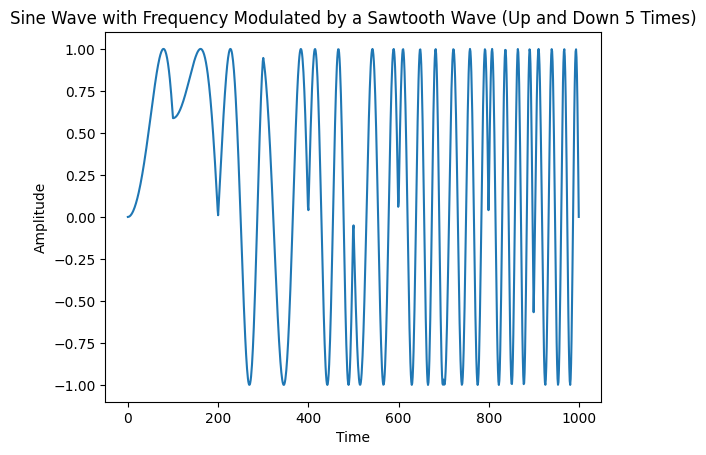

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth

# Generate a sine wave with frequency modulated by a sawtooth wave
def generate_sine_wave_with_frequency_modulation(timesteps, sweep_rate, cycles=3):
    x = np.linspace(0, 1, timesteps)
    # Generate a sawtooth wave with the specified number of cycles (scaled to [0, 1])
    sawtooth_wave = sawtooth(2 * np.pi * cycles * x, width=0.5)  # Width=0.5 makes it symmetric, like a triangle wave
    # Modulate the frequency of the sine wave using the sawtooth wave
    frequencies = sweep_rate * (sawtooth_wave + 1) / 2  # Normalize to range [0, sweep_rate]
    y = np.sin(2 * np.pi * frequencies * x)
    return y

timesteps = 1000
sweep_rate = 4  # Frequency sweep rate
sine_wave = generate_sine_wave_with_frequency_modulation(timesteps, sweep_rate, cycles=5)

plt.plot(sine_wave)
plt.title("Sine Wave with Frequency Modulated by a Sawtooth Wave (Up and Down 5 Times)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [2]:
# Prepare the data for LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 50
X, y = create_sequences(sine_wave, seq_length)

# Reshape X to fit LSTM input shape (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (950, 50, 1)
Shape of y: (950,)


/Users/eric/proj/code-projects/PINNiped/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2433 - val_loss: 0.1624
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0481 - val_loss: 0.0776
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0197 - val_loss: 0.0371
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - val_loss: 0.0247
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0109 - val_loss: 0.0177
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0097 - val_loss: 0.0134
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - val_loss: 0.0126
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0098
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064 - val_loss: 0.0098
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0043 - val_loss: 0.0063
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

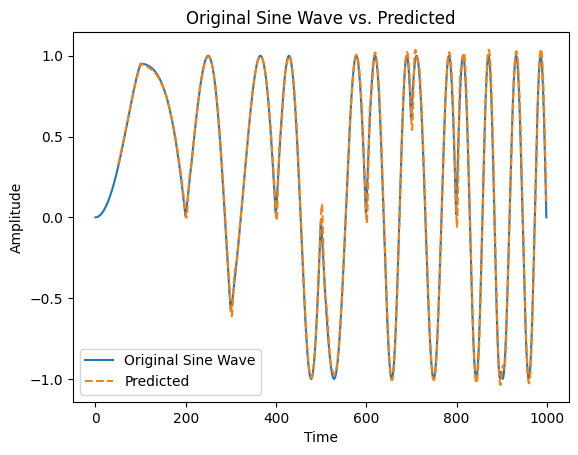

In [5]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Generate predictions
predicted = model.predict(X)

# Plot the original sine wave and the predicted values
plt.plot(sine_wave, label='Original Sine Wave')
plt.plot(np.arange(seq_length, len(predicted) + seq_length), predicted, label='Predicted', linestyle='--')
plt.title("Original Sine Wave vs. Predicted")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


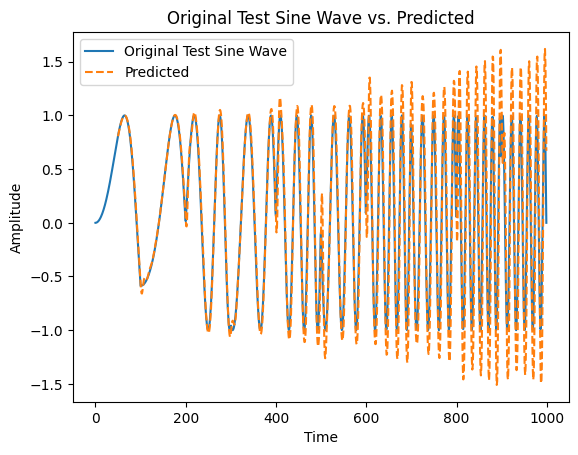

In [10]:

# Generate test data with a different sweep rate
sweep_rate_test = 6  # Frequency sweep rate for testing
sine_wave_test = generate_sine_wave_with_frequency_modulation(timesteps, sweep_rate_test, cycles=5)
X_test, y_test = create_sequences(sine_wave_test, seq_length)

# Reshape X_test to fit LSTM input shape (samples, timesteps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Generate predictions
predicted_test = model.predict(X_test)

# Plot the original test sine wave and the predicted values
plt.plot(sine_wave_test, label='Original Test Sine Wave')
plt.plot(np.arange(seq_length, len(predicted_test) + seq_length), predicted_test, label='Predicted', linestyle='--')
plt.title("Original Test Sine Wave vs. Predicted")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()